<img src="https://raw.githubusercontent.com/UCLAMAEThreads/FluidDynTools.jl/main/notebook/logo_UCLA_blue_boxed.svg" alt="ucla logo" width="150" align="left"/>

### **Introduction to Fluid Dynamics**
<hr />

# General potential flows around bodies in 2D
In the previous notebook, we looked at how we could assemble flows past
bodies through superposition of singularities. That provided a
nice way to understand the intuition of the solution. However,
it turns out that there is a more elegant procedure for constructing
the solution of potential flow around 2D objects.

The procedure consists of two ingredients
1. We solve the problem for a body in the shape of the unit circle (a circle of radius 1)
2. We map that circle geometry into the actual geometry we desire

If the mapping in step 2 is a **conformal transformation**, then the solution
for the unit circle problem is guaranteed to be the solution for the
actual problem. This is because conformal transforms preserve a lot of
the important aspects of the flow, particularly the no-flow-through condition.

In this notebook we will look at some examples of conformal transforms. Then, in
the next notebook, we will explore flow fields for some basic problems.

In [1]:
using FluidDynTools

In [2]:
using PotentialFlow
using PotentialFlow.Bodies
import PotentialFlow: Polygon

In [3]:
using Plots

## Examples of conformal transforms
A conformal transform has the general form $z(\zeta)$, mapping points from the
$\zeta$ plane (where the circle lives) to the $z$ plane, where our "real"
geometry lives. We will make use of a rigid-body transform to place the
desired shape at the right spot at the right orientation.

$$z(\zeta) = Z_{r} + \mathrm{e}^{\mathrm{i}\alpha} \tilde{z}(\zeta)$$

Thus, the shape itself is specified by the conformal transform $\tilde{z}(\zeta)$,
and $Z_{r}$ and $\alpha$ specify the position and angle.

We will look at two ways of constructing conformal transforms:
1. By specifying the coefficients in a power series
2. By a class of transforms that map a circle into a polygon

### Power series bodies
First, the power series type. To create a body shape, we specify the complex coefficients $c_{i}$ in the mapping

\begin{equation}
\tilde{z}(\zeta) = c_{1}\zeta + c_{0} + \sum_{j=1}^{\infty} \frac{c_{-j}}{\zeta^j}
\end{equation}

The coefficients are specified in the order in which they appear in this series:
`ccoeff[1]` $\rightarrow c_{1}$, `ccoeff[2]` $\rightarrow c_{0}$, `ccoeff[3]` $\rightarrow c_{-1}$, and so on.

Usually, we do not specify $c_{0}$, because we

An elliptical body just consists of $c_{1}$ and $c_{-1}$, where $c_{1} = (a+b)/2$
and $c_{-1} = (a-b)/2$, where $a$ and $b$ are the semi-major and minor axis lengths.
We will place the body at the origin, rotated by $\alpha = \pi/4$. We use
the `ConformalBody` function for this.

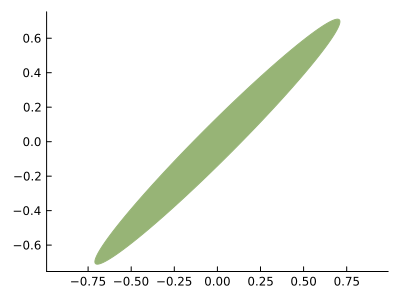

In [4]:
a, b = 1, 0.1
ccoeff = ComplexF64[0.5(a+b), 0, 0.5(a-b)]
Zr = 0.0+0.0im
α = π/4
b = ConformalBody(ccoeff,Zr,α)
plot(b)

We can see how this mapping works by visualizing the gridlines in the circle ($\zeta$) plane
and the corresponding lines in the physical plane (the $z$ plane). Importantly,
all of the

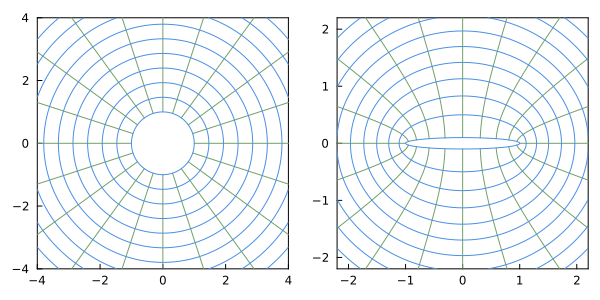

In [5]:
plot(b.m,size=(600,300))

It is easy to get a flat plate from the ellipse by setting $b = 0$.

More interesting shapes can be obtained by choosing the coefficients differently.
There are a few rules on these coefficients:
- $c_{1}$ must be present, and generally should be a positive real number. It
  re-scales distances from the circle plane to the physical plane.
- $c_{0}$ is usually zero.
- The other coefficients are mostly free, but some combinations will break down.

It is best to simply play around. Here is another one. Notice that
we do not specify position or orientation here, so it defaults to the origin and
zero angle.

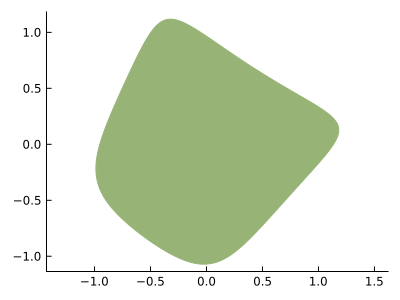

In [6]:
ccoeff = ComplexF64[1.0,0.0,0.0,0.1,0.1*exp(im*π/4)]
b = ConformalBody(ccoeff)
plot(b)

### Polygonal bodies
To create a polygonal body, we use a Schwarz-Christoffel conformal transformation,
a general class of transformations that can map specific points on the
circle to specified angles in the $z$ plane. That is done automatically by the
`ConformalBody` function. We just need to provide it with a polygon.

To set up a polygon, we specify the vertices in
counterclockwise order, with coordinates provided in either (x,y) or complex notation.

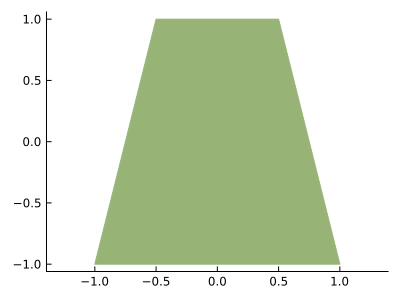

In [7]:
x = [-1.0,1.0,0.5,-0.5]
y = [-1.0,-1.0,1.0,1.0]
p = Polygon(x,y)
b = ConformalBody(p)
plot(b)

This makes a simple trapezoid. Let's see the mapping more clearly

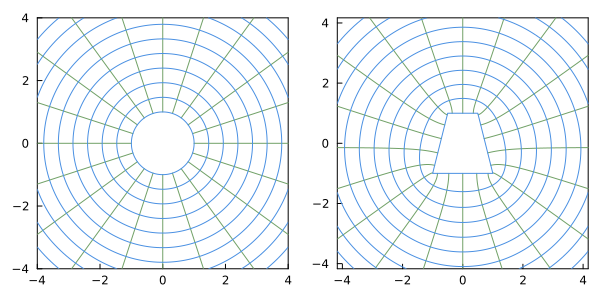

In [8]:
plot(b.m,size=(600,300))

How about a star?

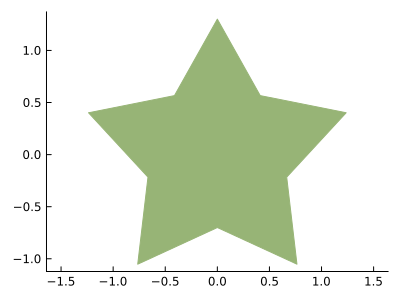

In [9]:
npts = 5
dθ = 2π/(2npts)
θ = collect(0:dθ:2π-dθ)
w = (1 .+ 0.3cos.(npts*θ)).*exp.(im*θ) # the vertices
p = Polygon(w)
Zr = 0.0+0.0im
α = dθ/2 # rotate to make one point of the star directed upward
b = ConformalBody(p,Zr,α)
plot(b)

or an airfoil? Here, we use the NACA 4-digit series of airfoils, in
which the first number specifies the camber, the second is the location
of maximum camber, and the last two numbers the thickness. A NACA 4412
has camber of 0.04 (relative to chord) located at 0.4 of the chord, and
a thickness of 0.12. We implement this with a large
number of vertices, so it looks smooth but actually it is a polygon!

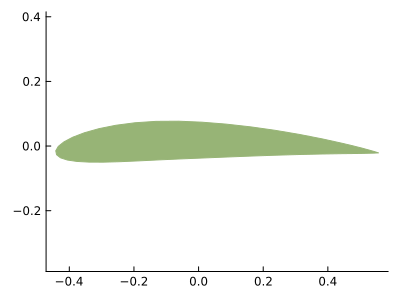

In [10]:
w = naca4(0.04,0.4,0.12;len=1)
p = Polygon(w)
b = ConformalBody(p)
plot(b)

Finally, a polygon need not have an enclosed area, but rather can double back
on itself, to form a set of linked lines with zero thickness. The `LinkedLines`
function allows us to specify the vertices of the line segments.

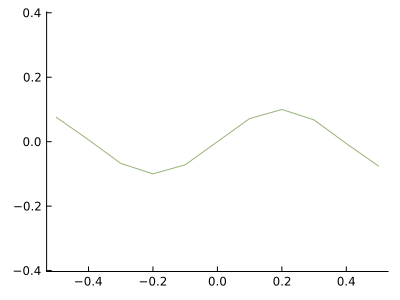

In [11]:
x = -0.5:0.1:0.5
p = LinkedLines(x,0.1*sin.(8*x))
b = ConformalBody(p)
plot(b)

Let's see how the transform looks in this case:

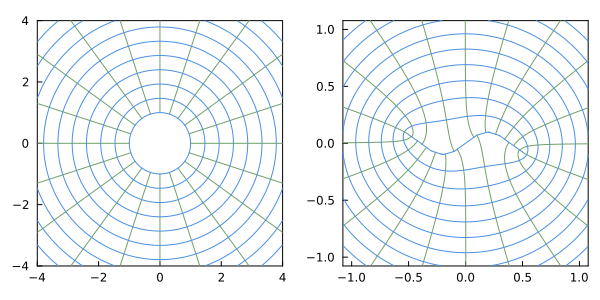

In [12]:
plot(b.m,size=(600,300))

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*